In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

In [2]:
#Reading happiness data csv into a dataframe
happiness_df = pd.read_csv('Happiness_Data.csv')

#Dropping all columns that I will not be using in my analysis
happiness_df.drop(happiness_df.iloc[:, 4:13], inplace = True, axis = 1)

#Displaying dataframe to check for any errors in my columns
happiness_df.head()

,Country,Region,Happiness Rank,Happiness Score
0,Denmark,Western Europe,1,7.526
1,Switzerland,Western Europe,2,7.509
2,Iceland,Western Europe,3,7.501
3,Norway,Western Europe,4,7.498
4,Finland,Western Europe,5,7.413


In [3]:
#Reading happiness data csv into a dataframe
AutoD_df = pd.read_csv('Road_Deaths.csv')

#Dropping an older year's data
AutoD_df = AutoD_df.drop(['Estimated road traffic death rate (per 100 000 population).1'], axis=1)

AutoD_df.head()

,Unnamed: 0,Estimated number of road traffic deaths,Estimated road traffic death rate (per 100 000 population)
0,Country,2013,2016.0
1,Afghanistan,4 734 [4 006 - 5 461],15.1
2,Albania,478 [435 - 521],13.6
3,Algeria,9 337 [7 985 - 10 689],NaN
4,Andorra,6,NaN


In [4]:
#Renaming the columns I'm using to make them more concise
AutoD_df = AutoD_df.rename(columns={"Unnamed: 0": "Country", "Estimated road traffic death rate (per 100 000 population)": "Auto Deaths Per Capita (per 100,000)"})

#Displaying dataframe
AutoD_df.head()

,Country,Estimated number of road traffic deaths,"Auto Deaths Per Capita (per 100,000)"
0,Country,2013,2016.0
1,Afghanistan,4 734 [4 006 - 5 461],15.1
2,Albania,478 [435 - 521],13.6
3,Algeria,9 337 [7 985 - 10 689],NaN
4,Andorra,6,NaN


In [5]:
#Merging the happiness data with the auto death data

ad_hap_merge = pd.merge(happiness_df, AutoD_df, on= "Country")

#Showing dataframe to see if the merge worked and what the data looks like combined
ad_hap_merge.head(2)

,Country,Region,Happiness Rank,Happiness Score,Estimated number of road traffic deaths,"Auto Deaths Per Capita (per 100,000)"
0,Denmark,Western Europe,1,7.526,196,4.0
1,Switzerland,Western Europe,2,7.509,269,2.7


In [6]:
#Reading homicide data csv into a dataframe

homicide_df = pd.read_csv('Homicide_Data.csv')

#Showing the dataframe to see what the data looks like
homicide_df.head()

,Unnamed: 0,Estimates of rates of homicides per 100 000 population,Estimates of rates of homicides per 100 000 population.1,Estimates of rates of homicides per 100 000 population.2,Estimates of rates of homicides per 100 000 population.3,Estimates of rates of homicides per 100 000 population.4,Estimates of rates of homicides per 100 000 population.5,Estimates of rates of homicides per 100 000 population.6,Estimates of rates of homicides per 100 000 population.7,Estimates of rates of homicides per 100 000 population.8,Estimates of rates of homicides per 100 000 population.9,Estimates of rates of homicides per 100 000 population.10,Estimates of rates of homicides per 100 000 population.11,Estimates of rates of homicides per 100 000 population.12,Estimates of rates of homicides per 100 000 population.13,Estimates of rates of homicides per 100 000 population.14
0,NaN,2016,2016,2016,2015,2015,2015,2010,2010,2010,2005,2005,2005,2000,2000,2000
1,Country,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female
2,Afghanistan,7.4,13.5,0.9,7.4,13.5,0.9,7.5,13.9,0.7,7.9,14.7,0.7,8.3,15.5,0.6
3,Albania,4.2,5.8,2.4,4.2,5.9,2.5,5.2,7.4,3.0,5.9,8.4,3.3,5.8,9.7,1.7
4,Algeria,4.2,6.4,1.9,4.3,6.6,2.0,5.6,8.6,2.5,6.4,9.8,3.0,7.2,10.8,3.6


In [7]:
#Renaming the columns to make the headings more concise
homicide_df = homicide_df.rename(columns={"Unnamed: 0": "Country", 
                                    "Estimates of rates of homicides per 100 000 population": "Male and Female Homicides Per Capita (per 100,000)",
                                    "Estimates of rates of homicides per 100 000 population.1": "Male Homicides Per Capita (per 100,000)",
                                    "Estimates of rates of homicides per 100 000 population.2": "Female Homicides Per Capita (per 100,000)"
                                   })

#Dropping columns from older years
homicide_df.drop(homicide_df.iloc[:, 4:16], inplace = True, axis = 1)


In [8]:
#Dropping the first two rows that contained header information
homicide_df = homicide_df.drop([0, 1])


In [9]:
#Merging the already merged happiness and auto death data with the homicide data
auto_homi_df = pd.merge(ad_hap_merge, homicide_df, on= "Country")

#Checking the data types in the dataframe to prep for graphing and calculations
auto_homi_df.dtypes

Country                                                object
Region                                                 object
Happiness Rank                                          int64
Happiness Score                                       float64
Estimated number of road traffic deaths                object
Auto Deaths Per Capita (per 100,000)                  float64
Male and Female Homicides Per Capita (per 100,000)     object
Male Homicides Per Capita (per 100,000)                object
Female Homicides Per Capita (per 100,000)              object
dtype: object

In [10]:
#Dataframe of only happiness score and auto deaths

hap_auto = auto_homi_df.drop(['Estimated number of road traffic deaths',
                              'Male and Female Homicides Per Capita (per 100,000)',
                              'Male Homicides Per Capita (per 100,000)',
                              'Female Homicides Per Capita (per 100,000)'
                             ], axis=1)
#Droppping any na values
hap_auto = hap_auto.dropna(how='all')

hap_auto = hap_auto.sort_values(by=['Auto Deaths Per Capita (per 100,000)'])

hap_auto.head()

,Country,Region,Happiness Rank,Happiness Score,"Auto Deaths Per Capita (per 100,000)"
1,Switzerland,Western Europe,2,7.509,2.7
3,Norway,Western Europe,4,7.498,2.7
19,Singapore,Southeastern Asia,22,6.739,2.8
9,Sweden,Western Europe,10,7.291,2.8
6,Netherlands,Western Europe,7,7.339,3.8


In [11]:
#Thailand data for presentation
hap_auto.loc[hap_auto['Country'] == 'Thailand']

,Country,Region,Happiness Rank,Happiness Score,"Auto Deaths Per Capita (per 100,000)"
28,Thailand,Southeastern Asia,33,6.474,32.7


In [12]:
#Highest Auto death rate
hap_auto.loc[hap_auto['Auto Deaths Per Capita (per 100,000)'].idxmax()]

Country                                            Liberia
Region                                  Sub-Saharan Africa
Happiness Rank                                         150
Happiness Score                                      3.622
Auto Deaths Per Capita (per 100,000)                  35.9
Name: 126, dtype: object

In [13]:
#Lowest Auto death rate
hap_auto.loc[hap_auto['Auto Deaths Per Capita (per 100,000)'].idxmin()]

Country                                    Switzerland
Region                                  Western Europe
Happiness Rank                                       2
Happiness Score                                  7.509
Auto Deaths Per Capita (per 100,000)               2.7
Name: 1, dtype: object

In [14]:
#Dataframe of only happiness and overall homicide rate

hap_homiO = auto_homi_df.drop(['Estimated number of road traffic deaths',
                               'Auto Deaths Per Capita (per 100,000)',
                              'Male Homicides Per Capita (per 100,000)',
                              'Female Homicides Per Capita (per 100,000)'
                             ], axis=1)
#Droppping any na values
hap_homiO = hap_homiO.dropna(how='all')

#converting columns with Object data type to float for calculations and graphing
hap_homiO[['Male and Female Homicides Per Capita (per 100,000)']] = hap_homiO[['Male and Female Homicides Per Capita (per 100,000)']].astype('float64')

hap_homiO.dtypes

Country                                                object
Region                                                 object
Happiness Rank                                          int64
Happiness Score                                       float64
Male and Female Homicides Per Capita (per 100,000)    float64
dtype: object

In [15]:
#Dataframe of happiness and male homicide rate
hap_homiM = auto_homi_df.drop(['Estimated number of road traffic deaths',
                               'Auto Deaths Per Capita (per 100,000)',
                              'Male and Female Homicides Per Capita (per 100,000)',
                              'Female Homicides Per Capita (per 100,000)'
                             ], axis=1)
#Droppping any na values
hap_homiM = hap_homiM.dropna(how='all')

#converting columns with Object data type to float for calculations and graphing
hap_homiM[['Male Homicides Per Capita (per 100,000)']] = hap_homiM[['Male Homicides Per Capita (per 100,000)']].astype('float64') 

hap_homiM.dtypes

Country                                     object
Region                                      object
Happiness Rank                               int64
Happiness Score                            float64
Male Homicides Per Capita (per 100,000)    float64
dtype: object

In [16]:
#Dataframe of happiness and female murder rate
hap_homiF = auto_homi_df.drop(['Estimated number of road traffic deaths',
                               'Auto Deaths Per Capita (per 100,000)',
                              'Male and Female Homicides Per Capita (per 100,000)',
                              'Male Homicides Per Capita (per 100,000)'
                             ], axis=1)
#Droppping any na values
hap_homiF = hap_homiF.dropna(how='all')

#converting columns with Object data type to float for calculations and graphing
hap_homiF[['Female Homicides Per Capita (per 100,000)']] = hap_homiF[['Female Homicides Per Capita (per 100,000)']].astype('float64')

hap_homiF.dtypes

Country                                       object
Region                                        object
Happiness Rank                                 int64
Happiness Score                              float64
Female Homicides Per Capita (per 100,000)    float64
dtype: object

In [17]:
#Replace NA fields with 0
auto_homi_df = auto_homi_df.fillna(0)

auto_homi_df.head()

,Country,Region,Happiness Rank,Happiness Score,Estimated number of road traffic deaths,"Auto Deaths Per Capita (per 100,000)","Male and Female Homicides Per Capita (per 100,000)","Male Homicides Per Capita (per 100,000)","Female Homicides Per Capita (per 100,000)"
0,Denmark,Western Europe,1,7.526,196,4.0,0.8,0.9,0.7
1,Switzerland,Western Europe,2,7.509,269,2.7,0.5,0.5,0.5
2,Iceland,Western Europe,3,7.501,15,6.6,1.2,1.5,1.0
3,Norway,Western Europe,4,7.498,192,2.7,0.6,0.7,0.5
4,Finland,Western Europe,5,7.413,258,4.7,1.3,1.7,0.9


In [18]:
#converting columns with Objet data type to float for calculations and graphing
auto_homi_df[['Male and Female Homicides Per Capita (per 100,000)']] = auto_homi_df[['Male and Female Homicides Per Capita (per 100,000)']].astype('float64')
auto_homi_df[['Male Homicides Per Capita (per 100,000)']] = auto_homi_df[['Male Homicides Per Capita (per 100,000)']].astype('float64')                        
auto_homi_df[['Female Homicides Per Capita (per 100,000)']] = auto_homi_df[['Female Homicides Per Capita (per 100,000)']].astype('float64')

#Checking the data types 
auto_homi_df.dtypes

Country                                                object
Region                                                 object
Happiness Rank                                          int64
Happiness Score                                       float64
Estimated number of road traffic deaths                object
Auto Deaths Per Capita (per 100,000)                  float64
Male and Female Homicides Per Capita (per 100,000)    float64
Male Homicides Per Capita (per 100,000)               float64
Female Homicides Per Capita (per 100,000)             float64
dtype: object

In [19]:
#Creating a dataframe that will only be used for graphs

grph_df = auto_homi_df.drop(['Happiness Rank','Estimated number of road traffic deaths'], axis=1)

#Making the country column the index
grph_df = grph_df.set_index('Country')

grph_df.head()

,Region,Happiness Score,"Auto Deaths Per Capita (per 100,000)","Male and Female Homicides Per Capita (per 100,000)","Male Homicides Per Capita (per 100,000)","Female Homicides Per Capita (per 100,000)"
Country,,,,,,
Denmark,Western Europe,7.526,4.0,0.8,0.9,0.7
Switzerland,Western Europe,7.509,2.7,0.5,0.5,0.5
Iceland,Western Europe,7.501,6.6,1.2,1.5,1.0
Norway,Western Europe,7.498,2.7,0.6,0.7,0.5
Finland,Western Europe,7.413,4.7,1.3,1.7,0.9


In [20]:
# Function to create Linear Regression plots
def linearRegrassionPlot(x_values, y_values, title, xlabel , ylabel, fileName):
        (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
        regress_values = x_values * slope + intercept
        line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
        plt.scatter(x_values,y_values, marker="o", facecolors="yellow", edgecolors="r", alpha=0.55)
        plt.plot(x_values,regress_values,"r-")
        # Creating an extra space on the plot for the equation of the regression line
        plt.annotate(line_eq,(x_values.min() , y_values.max()+ 0.05 * y_values.max()),fontsize=14,color="red")
        # To change the size of your pie chart/figure
        fig = plt.gcf()
        fig.set_size_inches(8,5)
        # Creating a title, x label, and y label
        plt.title(title, fontsize=18, color='Black', alpha=0.85)
        plt.xlabel(xlabel, fontsize=16)
        plt.ylabel(ylabel, fontsize=16)
#         r_value=(f"r-value: {rvalue}")
#         p_value=(f"p-value: {pvalue}")

        # Create x limits of our scatter plot
        if x_values.max() > 0:
            plt.xlim(x_values.min() - np.absolute(0.05 * x_values.min()) - 5, x_values.max() + 0.05 * x_values.max() + 5)
        else:
            plt.xlim(x_values.min() - np.absolute(0.05 * x_values.min()) - 5, x_values.max() - 0.05 * x_values.max() + 5)
        # Create y limits of our scatter plot
        if y_values.max() > 0:
            plt.ylim(y_values.min() - np.absolute(0.05 * y_values.min()) - 5, y_values.max() + 0.10 * y_values.max() + 5)
        else:
            plt.ylim(y_values.min() - np.absolute(0.05 * y_values.min()) - 5, y_values.max() - 0.10 * y_values.max() + 5)
        print(f"The r-squared is: {rvalue}")
        print(f"The equation of the regression line is: {line_eq}")
        print(f"The p-value is: {pvalue}")
        # Save the plotted figures as .pngs
        plt.savefig(fileName + '.png')
        plt.grid()
        plt.show()

In [21]:
Ho = 'Countries with a high happiness score have less auto deaths'
Ha = 'Countries with a high happiness score have more auto deaths'
null = 'Happiness does not determine auto deaths'

The r-squared is: -0.587129498298045
The equation of the regression line is: y = -0.07x + 6.51
The p-value is: 1.1057480094541628e-13


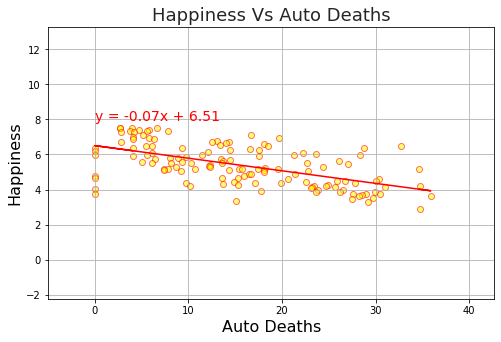

In [22]:
#Using the function to get the r and p values and also to display a scatter plot of Happiness and Auto deaths

linearRegrassionPlot(auto_homi_df['Auto Deaths Per Capita (per 100,000)'], auto_homi_df['Happiness Score'], 'Happiness Vs Auto Deaths', 'Auto Deaths', 'Happiness', 'Auto_Deaths2')

In [23]:
auto_homi_df.max()

Country                                                     Zimbabwe
Region                                                Western Europe
Happiness Rank                                                   157
Happiness Score                                                7.526
Auto Deaths Per Capita (per 100,000)                            35.9
Male and Female Homicides Per Capita (per 100,000)              55.5
Male Homicides Per Capita (per 100,000)                         85.9
Female Homicides Per Capita (per 100,000)                       32.1
dtype: object

In [24]:
Ho = 'Countries with a high happiness score have less homicides'
Ha = 'Countries with a high happiness score have more homicides'
null = 'Happiness does not determine homicide rate'

The r-squared is: -0.10314233101145907
The equation of the regression line is: y = -0.01x + 5.48
The p-value is: 0.23743547321858424


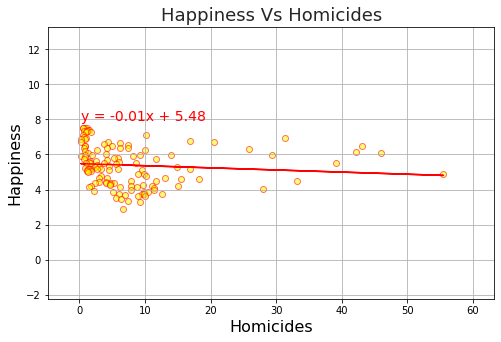

In [25]:
linearRegrassionPlot(auto_homi_df['Male and Female Homicides Per Capita (per 100,000)'], auto_homi_df['Happiness Score'], 'Happiness Vs Homicides', 'Homicides', 'Happiness', 'Homicides_Overall')

In [26]:
null = 'Happiness does not determine homicide rate'

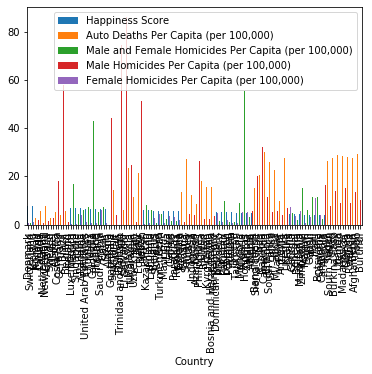

In [27]:
grph_df.plot.bar()

In [28]:
#Highest happiness score
auto_homi_df.loc[auto_homi_df['Happiness Score'].idxmax()]

Country                                                      Denmark
Region                                                Western Europe
Happiness Rank                                                     1
Happiness Score                                                7.526
Estimated number of road traffic deaths                          196
Auto Deaths Per Capita (per 100,000)                               4
Male and Female Homicides Per Capita (per 100,000)               0.8
Male Homicides Per Capita (per 100,000)                          0.9
Female Homicides Per Capita (per 100,000)                        0.7
Name: 0, dtype: object

In [29]:
#Lowest happiness score
auto_homi_df.loc[auto_homi_df['Happiness Score'].idxmin()]

Country                                                          Burundi
Region                                                Sub-Saharan Africa
Happiness Rank                                                       157
Happiness Score                                                    2.905
Estimated number of road traffic deaths                                0
Auto Deaths Per Capita (per 100,000)                                34.7
Male and Female Homicides Per Capita (per 100,000)                   6.6
Male Homicides Per Capita (per 100,000)                             10.1
Female Homicides Per Capita (per 100,000)                            3.1
Name: 132, dtype: object